In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("dataset_1.csv")

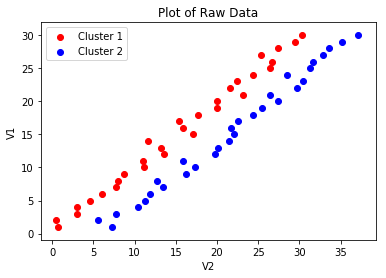

In [116]:
v1 = data["V1"]
v2 = data["V2"]

figure_1 = plt.figure()
ax1 = figure_1.add_subplot(1, 1, 1)
ax1.scatter(v2[0:30],v1[0:30], c='r',label="Cluster 1")
ax1.scatter( v2[30:],v1[30:],c='b',label="Cluster 2")
ax1.set_xlabel("V2")
ax1.set_ylabel("V1")
ax1.set_title("Plot of Raw Data")
ax1.legend()
figure_1

### Yes, there is a clear separation of the raw data

Principal Component Analysis

In [117]:
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
class My_PCA():

    def getStandardizedData(self,my_data):
        standardized_my_data = (my_data - np.mean(my_data, axis=0)) / np.std(my_data, axis=0)
        return standardized_my_data


    def my_variance(x):
        x_mean = np.mean(x)
        # Formula is Xi - XMean/N
        N = len(x)
        sum = 0
        for each in x:
            sum += math.pow((each - x_mean), 2)

        return sum / N

    def my_covariance(self,my_data):
        return np.cov(my_data,rowvar=False)

    def performPCA(self,data,standardizeLogic):
        #1. Mean Centre the Data
        if standardizeLogic:
            data = data - np.mean(data, axis=0)
        #Else do not Mean centre

        #2. Covariance Matrix
        myCOV = self.my_covariance(data)
        eigenValues, eigenVectors = LA.eig(myCOV)
        idx = np.argsort(eigenValues)[::-1]
        eigenVectors = eigenVectors[:,idx]
        eigenValues = eigenValues[idx]
        projections = np.dot(data,eigenVectors)
        
        return eigenValues,eigenVectors,projections


In [118]:
pca_object = My_PCA()
dataset = data.ix[:, data.columns.difference(['label'])]
dataset
eigenValues, eigenVectors, projections = pca_object.performPCA(dataset, True)

/home/kshitijgorde/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


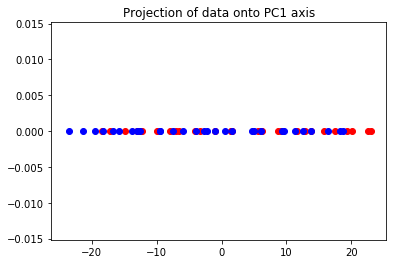

In [120]:
figure_2 = plt.figure()
ax2 = figure_2.add_subplot(1, 1, 1)
ax2.scatter(projections[:,0][0:30],[0]*30,c='r')
ax2.scatter(projections[:,0][30:],[0]*30,c='b')
ax2.set_title("Projection of data onto PC1 axis")
figure_2


## No there is no more clear separation visible

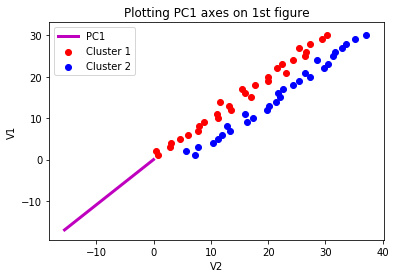

In [125]:
# Q (3)
figure_3 = plt.figure()
ax1 = figure_3.add_subplot(1, 1, 1)

ax1.plot([0,23*eigenVectors[0,0]],[0,23*eigenVectors[1,0]],linewidth=3,c='m',label='PC1')
ax1.scatter(v2[0:30],v1[0:30],c='r',label='Cluster 1')
ax1.scatter(v2[30:],v1[30:],c='b',label = 'Cluster 2')
ax1.set_title("Plotting PC1 axes on 1st figure")
ax1.set_xlabel("V2")
ax1.set_ylabel("V1")
ax1.legend()
figure_3

## Linear Discriminant Analysis

In [126]:
class LDA(object):
    def __init__(self,input_matrix):
        self.input = np.copy(data)
    
    def get_eigenvalue_eigenvector(self,WStar):         
        return np.linalg.eig(np.array(WStar))
        
    
    
    def perform_LDA(self):
        '''Performs LDA on the given input_matrix (ground truth is last column)'''
        x = self.input[:,:-1]
        #print(len(np.unique(self.input[:,-1])))
        total_classes = len(np.unique(self.input[:,-1]))
        mean_vector = []

        for k in range(0, total_classes):
            mu_for_class = np.sum(self.input[self.input[:,-1] == k], axis = 0)/len((self.input[self.input[:,-1] == k]))
            mean_vector.append(np.delete(mu_for_class,self.input.shape[1]-1,0)) 

            
        #print(mean_vector)
        #Calculate overall mean of the data..
        overall_mean = np.sum(x, axis=0)/len(x)
        #Calculate within class covariance matrix  
        
        S_W = np.zeros((x.shape[1],x.shape[1]))
        for k in range(0, total_classes):
            xc = self.input[self.input[:,-1] == k][:,:-1]
            sc = np.zeros((x.shape[1],x.shape[1]))
            for m in range (0,xc.shape[0]):
                x_minus_mean = (xc[m] - mean_vector[k]).reshape(x.shape[1],1)
                x_minus_mean_transpose = x_minus_mean.T 
                sc += np.matmul(x_minus_mean,x_minus_mean_transpose) 
            S_W +=  sc

        #Calculating S_between
        S_B = np.zeros((x.shape[1],x.shape[1]))
        for k in range(0, total_classes):
            mean_difference = (mean_vector[k] - overall_mean).reshape(overall_mean.shape[0],1)
            mean_difference_T = mean_difference.T;
            S_B += np.matmul(mean_difference,mean_difference_T)
 

        W_star = np.matmul(np.linalg.inv(S_W),S_B)

        #Get EigenValues and EigenVectors
        eigen_values, eigen_vectors = self.get_eigenvalue_eigenvector(W_star)

        #Sorting
        indexes = eigen_values.argsort()[::-1]
        eigen_value = eigen_values[indexes]
        pcs = eigen_vectors[:,indexes]

        
        output = np.dot(x,pcs[:,0:total_classes-1])

        return mean_vector,S_W,S_B, W_star,output,pcs

In [127]:
lda_object = LDA(data.as_matrix)
mean,S_within,S_between, W_star, lda_output,eigenVector_LDA = lda_object.perform_LDA()

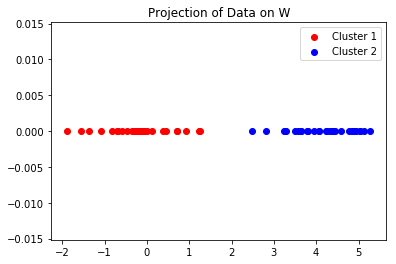

In [129]:
figure_4 = plt.figure()
ax = figure_4.add_subplot(1, 1, 1)
ax.set_title("Projection of Data on W")
ax.scatter(lda_output[0:30],[0]*30,c='r',label='Cluster 1')
ax.scatter(lda_output[30:],[0]*30,c='b',label='Cluster 2')
ax.legend()
figure_4

## Yes we do see a clear separation of Data in LDA since LDA preseves the discrimination information

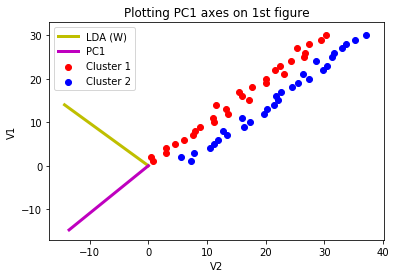

In [132]:
figure_5 = plt.figure()
ax1 = figure_5.add_subplot(1, 1, 1)

ax1.plot([0,20*eigenVector_LDA[0,0]],[0,20*eigenVector_LDA[1,0]],linewidth=3,c='y',label='LDA (W)')
ax1.plot([0,20*eigenVectors[0,0]],[0,20*eigenVectors[1,0]],linewidth=3,c='m',label='PC1')
ax1.scatter(v2[0:30],v1[0:30],c='r',label='Cluster 1')
ax1.scatter(v2[30:],v1[30:],c='b',label = 'Cluster 2')
ax1.set_title("Plotting PC1 axes on 1st figure")
ax1.set_xlabel("V2")
ax1.set_ylabel("V1")
ax1.legend()
figure_5

### Q (7)

In [133]:
PC1_projections = projections[:,0]
PC2_projections = projections[:,1]

In [134]:
# Compute variance along PC1
PC1_variance = PC1_projections - np.mean(PC1_projections)
PC1_variance = np.sum(PC1_variance ** 2)/59
PC1_variance

161.04072383224943

In [135]:
#Compute Variance along PC2
PC2_variance = PC2_projections - np.mean(PC2_projections)
PC2_variance = np.sum(PC2_variance ** 2)/59
PC2_variance

5.1252838876924143

In [136]:
#Eigenvalues used in Covariance matrix are
eigenValues

array([ 161.04072383,    5.12528389])

### The variance along PC1 and PC2 axis and the eignevalues used for computing Covariance matrix is same. Hence we know that Eigenvalues are correctly explaining variance along principal component axis

### 8. Compute Variance of Projections along W

In [137]:
lda_variance = lda_output - np.mean(lda_output)
lda_variance = np.sum(lda_variance ** 2)/59
lda_variance

5.3136358210281962

### Message from the Analyses

#### PCA and LDA both focus on reducing dimensionality of the data. While PCA focuses on preserving the variance in the dataset, LDA preserves discriminatory information. LDA always reduces the dimension to 1 whereas user chooses how many Principal components they'd like to use (usually done by how much % of variance the PC's explain). If 3 PC's explain 75% variance and 4PC's expalin 76% variance, then it's wise to choose 3 PC's and reduce the dimensions to 3. 

### Question 2. Artificial Neural Network for Classification Task

In [2]:
import math # For cost function (log)

class My_NeuralNetwork:
    def __init__(self,X,y,hidden_size):
        self.input_layer_size = len(X)
        self.output_layer_size = len(y) + 1 #for bias
        self.hidden_layer_size = hidden_size
        self.total_layers = self.hidden_layer_size + 2 # For input and output
        #Initialize the weights (thetas)
        self.theta_1 = np.random.uniform(0.0,1.0,(2,3))
        self.theta_2 = np.random.uniform(0.0,1.0,(1,3))
        self.activations = {}
        self.a1 = 0
        self.hidden_layer_unit = np.array([2,1])
        self.a2 = 0
        self.a3 = 0
        self.delta_3 = 0
        self.delta_2 = 0
        self.alpha = 0.1
        self.costs = []
        self.all_theta_1 = []
        self.all_thetas = {}
        self.all_theta_2 = []
        self.delta = {}
        self.error = []
        self.j_l = 0
        self.thetaGradient = {}
        
    def assign_thetas(self, X):
        self.all_thetas = {}
        activation = x[1]  
        activation = np.append(np.array([1]),activation) #Appending the Bias to activation
        activation = (activation[np.newaxis]).T 
        for i in range(1,self.total_layers):
             #calculating the size theta_matrix
            s_j = activation.size-1
            s_j_1 = self.hidden_layer_unit[i-1]
            theta_size = s_j_1 * (s_j+1)
            theta = np.random.uniform(0,1,theta_size)
            theta = theta.reshape(s_j_1,(s_j+1))
            self.all_thetas[i] = theta
        
    
    def sigmoid(self,e,derivative=False):
        '''Sigmoid Activation Function'''
        if derivative == True:
            return (e * (1-e))
        return 1/(1+np.exp(-e))
    
    def forward_propogation(self,x):
        '''Forward propogate values through the network'''
        self.activations = {}
        activation = x  
        activation = np.append(np.array([1]),activation)
        activation = (activation[np.newaxis]).T 
        self.activations[1] = activation
        
        
        for i in range(1,self.total_layers):
            z = np.matmul(self.all_thetas[i],self.activations[i])
            activation = self.sigmoid(z)
            activation = np.append(np.array([1]),activation)
            activation = (activation[np.newaxis]).T       
            self.activations[i+1] = activation
        
    
    def calculateDelta(self, y):
        self.delta = {}
        self.delta[self.total_layers] = self.activations[self.total_layers][1,:] - y.T
        # Deltas for remaining layers
        for i in range(self.total_layers-1, 1, -1):
            t = np.array(np.matmul(self.all_thetas[i].T,self.delta[i+1]))
            t = (t[np.newaxis]).T 
            self.delta[i] = np.multiply(t,(self.activations[i]*(1-self.activations[i])))
            self.delta[i] = self.delta[i][1:3,:]
    
    def get_error(self, X):
        error = 0
        self.predictions = []
        for sample in range(0,100):
            self.forward_propogation(X[sample])
            if(self.activations[3][1,:]>=0.5):
                self.predictions.append(1)
            else:
                self.predictions.append(0)

        for sample in range(0,100):
            if(self.predictions[sample]!=y[sample]):
                error = error + 1
        return error
    
    def train_neural_network(self, X, y):
        from ipywidgets import FloatProgress
        from time import sleep
        from IPython.display import display
        f = FloatProgress(min=0, max=100)
        display(f)
        f.description = "Training Neural Net:"
    
        
        average = 0
        big_deltas = {}
        theta_g = {}
        big_deltas[1] = np.zeros(6).reshape(2,3)
        big_deltas[2] = np.zeros(3).reshape(1,3)
        self.assign_thetas(X)
        err = []
        average_error = 0
        err_avg = 0

        for value in range(0,100):
            sleep(0.1)
            f.value = value
            X_test = X[value]
            X_train = np.delete(X, (value), axis=0)
            y_test = y[value]
            y_train = np.delete(y, (value), axis=0)
            for iteration in range(0,200):    
                big_deltas[1] = np.zeros(6).reshape(2,3)
                big_deltas[2] = np.zeros(3).reshape(1,3)
                
                for _ in range(99):
                    # Forward Propogation
                    self.forward_propogation(X_train[_])
                    
                    # Implement Back-Propogation....
                    #Calculate Deltas in each layer
                    self.calculateDelta(y_train[_])
                    
                    #Cost function for Classification
                    self.a3 = np.asscalar((self.activations[self.total_layers])[1,:])
                    self.j_l = self.j_l + (y_train[_]*math.log10(self.a3) + ((1-y_train[_])*math.log10(1-self.a3)))
                    
                    #Gradient Descent
                    for m in range(self.total_layers-1, 0, -1):
                        td = np.matmul(self.delta[m+1],self.activations[m].T)
                        big_deltas[m] += td
                
                for m in range(self.total_layers-1, 0, -1):
                    theta_g[m] = big_deltas[m]/99
                    
                #Subtract the Gradient
                
                for m in range(self.total_layers-1, 0, -1):
                    self.all_thetas[m] = self.all_thetas[m] - (self.alpha * theta_g[m])
                
                
                self.costs.append(-(self.j_l/99))
                self.j_l = 0
            self.forward_propogation(X_test)
            if(self.activations[3][1,:] >= 0.5 and y_test == 0):
                err_avg = err_avg + 1
            elif(self.activations[3][1,:] < 0.5 and y_test == 1):
                err_avg = err_avg + 1
            
            
        error = self.get_error(X)
        f.description = "Training Complete: "
        # Now, accuracy will be 100 - error
        accuracy = 100 - error
        print("Average Error: {}".format(err_avg/100))
        print("Accuracy is: {}%".format(accuracy))
            
                


In [3]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:,2:][50:]
y = iris.target[50:]
#Adjust the Classes to be 0 & 1
y[y==1] = 0
y[y==2] = 1
# Insert bias

#x[0][np.newaxis].T
# standardising the data
min_val = np.amin(x, axis=0)
max_val = np.amax(x, axis=0) 
x = x - min_val
x = x/(max_val - min_val)



In [4]:
# Train the Neural Network with the obtained Dataset
neural_network = My_NeuralNetwork(x, y, 1)

## Please note: I've used a loader to track progress of neural net training. The modules required for this comes included with jupyter notebook. However, if this throws error then please use pip install ipywidgets.
## If it still doesn't work, please comment line: 96-97 & 111, 112


In [6]:
neural_network.train_neural_network(x, y)
print("Learning Rate : 0.1 (Fast Convergence)")
print(neural_network.predictions)

Average Error: 0.09
Accuracy is: 94%
Learning Rate : 0.1 (Fast Convergence)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Question 3. Logistic Regression

In [142]:
class My_LogisticRegression():
    '''Implements my own Logistic Regreesion!'''
    def __init__(self, iterations):
        '''Handles all initializations'''
        self.iterations = iterations
        self.learning_rate = 5
        self.average_error = 0
        self.classfications = []
        self.theta = np.matrix(np.zeros(3))
        self.predictions = []
    
    def sigmoid(self,e,derivative=False):
        '''Sigmoid Activation Function'''
        if derivative == True:
            return (e * (1-e))
        return 1/(1+np.exp(-e))
    
    def logistic_regress(self, X, y):
        samples = len(X)
        X = np.hstack((np.ones((samples,1)),X))
        dimensions = 3
        
        # Start with leave one out analysis
        for value in range(0,100):
            X_test = X[value]
            X_train = np.delete(X, (value), axis=0)
            y_test = y[value]
            y_train = np.delete(y, (value), axis=0)
            self.theta = np.matrix(np.zeros(3))
            
            for _ in range(self.iterations - 1):
                score = np.dot(X_train, self.theta.T)
                self.predictions = self.sigmoid(score)
                curr_resi = self.predictions - np.array([y_train]).T
                gradient = np.zeros(3)
                for i in range(3):
                    delta_sum = curr_resi.T.dot(X_train[:, i])
                    gradient[i] = (1.0 / X_train.shape[0]) * delta_sum * - 1
                
                self.theta += self.learning_rate * gradient
            #Test sample
            th_X = np.dot(X_test,self.theta.T)
            h_Theta_x = self.sigmoid(th_X)
            if(h_Theta_x >= 0.5 and y_test == 0):
                self.average_error += 1
            elif(h_Theta_x < 0.5 and y_test == 1):
                self.average_error += 1
            
        print("Average Error: {}".format(self.average_error/100))
        self.predict(X)
    
    def predict(self, X):
        for i in range(len(X)):
            th_X = np.dot(X[i],self.theta.T)
            h_Theta_x = self.sigmoid(th_X)
            if(h_Theta_x >= 0.5):
                self.classfications.append(1)
            elif(h_Theta_x < 0.5):
                self.classfications.append(0)

        
        
        

In [143]:
logistic_regression = My_LogisticRegression(10)
logistic_regression.logistic_regress(x,y)
print(logistic_regression.classfications)

Average Error: 0.06
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Comparision of outputs of Neural Network and Logistic Regression

In [144]:
print("Predictions from Neural Network")
print(neural_network.predictions)
print("\n\n")
print("Predictions from Logistic Regression")
print(logistic_regression.classfications)

Predictions from Neural Network
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]



Predictions from Logistic Regression
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#### The predictions are quite similar with minor differences for every run. In this particular instance only 56th flower is differently classified by neural network and logistic regression